<a href="https://colab.research.google.com/github/dragon222001/BitCoin-Price-Predictor/blob/master/Bitcoin_Predictor_Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Visualising the Data**



Importing the required Libraries

In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Accessing the Dataset

In [2]:
dataset = pd.read_csv('https://firebasestorage.googleapis.com/v0/b/aarambh-aider.appspot.com/o/images%2Fbitcoin.csv?alt=media')

Checking for null values

In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627190 entries, 0 to 627189
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date_id       627190 non-null  object 
 1   datetime_id   627190 non-null  object 
 2   market        627190 non-null  object 
 3   rpt_key       627190 non-null  object 
 4   last          627190 non-null  float64
 5   diff_24h      627190 non-null  float64
 6   diff_per_24h  627190 non-null  float64
 7   bid           627190 non-null  float64
 8   ask           627190 non-null  float64
 9   low           627190 non-null  float64
 10  high          627190 non-null  float64
 11  volume        627190 non-null  float64
 12  created_at    627190 non-null  object 
 13  updated_at    627190 non-null  object 
dtypes: float64(8), object(6)
memory usage: 67.0+ MB
None


For the first Graph, making a seperate dataset to enhance the clearity.

In [4]:
data_sorted = pd.DataFrame({'Dates':dataset['date_id'].unique(),'Average':dataset[dataset['rpt_key'].isin(['btc_usd'])]['high'].groupby(dataset['date_id']).mean()})

In [5]:
data_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 2017-05-31 to 2017-07-14
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Dates    34 non-null     object 
 1   Average  34 non-null     float64
dtypes: float64(1), object(1)
memory usage: 816.0+ bytes


(1) Bitcoin High Prices variation along date and time

I calculated the position of the months and alloted them there.

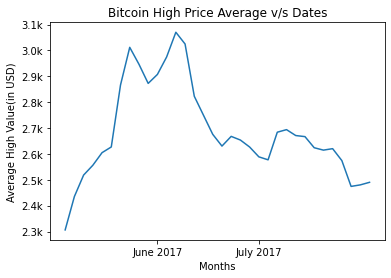

In [6]:
tic_x = [10,21]
tic_y = [2300,2400,2500,2600,2700,2800,2900,3000,3100]
label_x=['June 2017','July 2017']
label_y=['2.3k','2.4k','2.5k','2.6k','2.7k','2.8k','2.9k','3.0k','3.1k']
plt.plot(data_sorted['Dates'],data_sorted['Average'])
plt.xticks(ticks=tic_x, labels=label_x)
plt.yticks(ticks=tic_y,labels=label_y)
plt.xlabel('Months')
plt.ylabel('Average High Value(in USD)')
plt.title('Bitcoin High Price Average v/s Dates')
plt.show()

(2) Top 20 Volatile days

In [9]:
data = dataset[dataset['market'] == "bitstamp"]
data = data[data["rpt_key"] == "btc_usd"]
data = data[["date_id", "last"]]
data.head(10)

,date_id,last
3,2017-05-31,2237.40
15,2017-06-01,2248.39
23,2017-06-01,2248.35
33,2017-06-01,2250.00
43,2017-06-01,2253.78
53,2017-06-01,2257.39
63,2017-06-01,2255.70
73,2017-06-01,2258.00
83,2017-06-01,2255.33
93,2017-06-01,2257.74


In [13]:
data1 = pd.DataFrame({'date': data['date_id'].unique(), 'high': data['last'].groupby(data['date_id']).max(), 'low': data['last'].groupby(data['date_id']).min()})
data1.head(20)

,date,high,low
date_id,,,
2017-05-31,2017-05-31,2237.40,2237.40
2017-06-01,2017-06-01,2455.39,2248.35
2017-06-02,2017-06-02,2449.54,2321.08
2017-06-03,2017-06-03,2541.50,2401.55
2017-06-04,2017-06-04,2583.31,2480.07
2017-06-05,2017-06-05,2612.27,2469.79
2017-06-06,2017-06-06,2932.00,2608.40
2017-06-07,2017-06-07,2892.01,2701.77
2017-06-08,2017-06-08,2831.27,2623.33


In [14]:
data1['change']=100*(data1['high']-data1['low'])/data1['low']

In [15]:
data1.head()

,date,high,low,change
date_id,,,,
2017-05-31,2017-05-31,2237.40,2237.40,0.000000
2017-06-01,2017-06-01,2455.39,2248.35,9.208531
2017-06-02,2017-06-02,2449.54,2321.08,5.534493
2017-06-03,2017-06-03,2541.50,2401.55,5.827486
2017-06-04,2017-06-04,2583.31,2480.07,4.162786


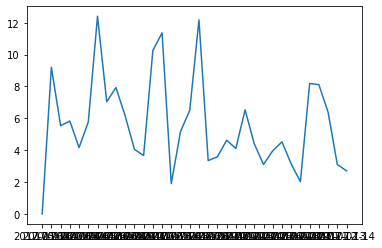

In [17]:
plt.plot(data1["date"], data1["change"])
plt.show()

In [19]:
top_change=data1.nlargest(20, ['change'])

In [20]:
top_change

,date,high,low,change
date_id,,,,
2017-06-06,2017-06-06,2932.00,2608.40,12.406073
2017-06-28,2017-06-28,2569.99,2291.00,12.177652
2017-06-13,2017-06-13,2783.00,2498.98,11.365437
2017-06-12,2017-06-12,2980.00,2703.11,10.243386
2017-06-01,2017-06-01,2455.39,2248.35,9.208531
2017-07-10,2017-07-10,2563.99,2370.00,8.185232
2017-07-11,2017-07-11,2434.99,2252.31,8.110784
2017-06-08,2017-06-08,2831.27,2623.33,7.926567
2017-06-07,2017-06-07,2892.01,2701.77,7.041310


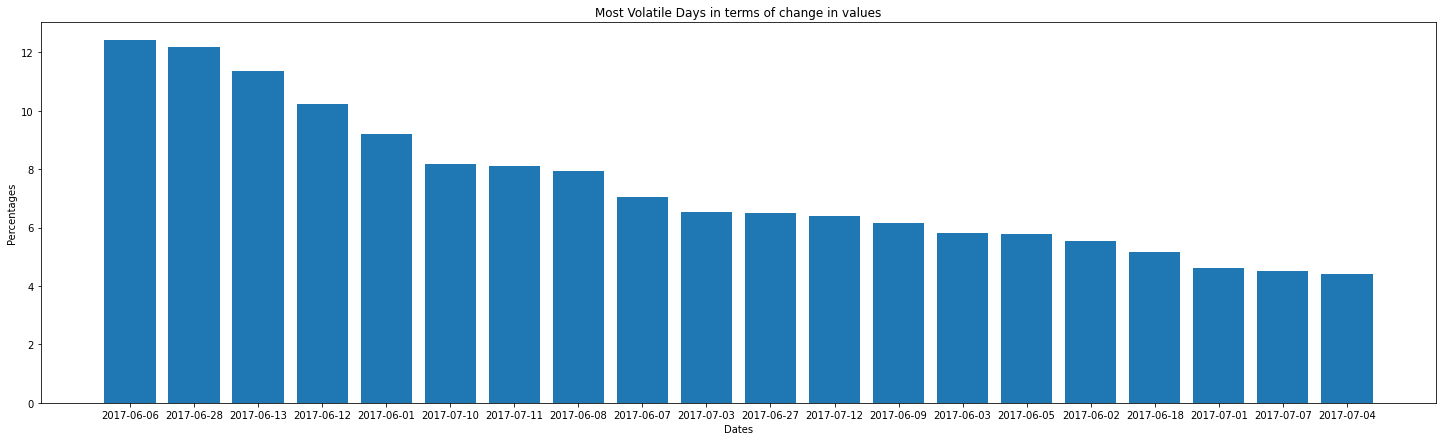

In [28]:
fig = plt.figure(figsize=(25,7))
plt.bar(top_change['date'],top_change['change'])
plt.xlabel('Dates')
plt.ylabel('Percentages')
plt.title('Most Volatile Days in terms of change in values')
plt.show()